<h1>Классификация танков по 8 классам<br> из собранного мною датасета в 1680 картинок.

Картинки разного размера без предобработки.
Картинки загружены на Google Drive и размещены по 2 папкам:
1. Train - тут хранятся картинки для обучающей выборке.
2. Valid - для проверочной.<br>
- Уменьшу картинки до размера 112*112 для быстродействия НС.<br>
- Построю НС на основе сверточных слоев Conv2D.<br>
- Посмотрю как распознаются картинки танков (predict).<br>
- Сделаю вывод.

In [0]:
#Загрузка необходимых библиотек
from keras_preprocessing.image import ImageDataGenerator 
from __future__ import print_function, division
from keras.datasets import mnist, cifar10
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, MaxPooling2D, concatenate, Embedding, multiply
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import sys
import numpy as np

Using TensorFlow backend.


In [0]:
# Создаю функцию *plotAny* для отрисовки графиков доли верных ответов
# на обучающем и на проверочном наборах
def plotAny():
  plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
  plt.plot(history.history['val_accuracy'], 
          label='Доля верных ответов на проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')
  plt.legend()
  plt.show()

In [0]:
#Функция проверки обученной модели на картинках
def predictImage():
  img = image.load_img(img_path, target_size=(112, 112))
  plt.imshow(img)
  plt.show()
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  prediction = model.predict(x)
  prediction = np.argmax(prediction)
  print("Распознанный образ: ", prediction)
  print("Название распознанного образа: ", classes[prediction])

In [0]:
#Подгрузка google-drive, где хранятся картинки с танками
from google.colab import drive
drive.mount('/content/drive1')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive1


### Подготовка данных картинок 8ми классов при помощи библиотеки **ImageDataGenerator**

In [0]:
# Rescale/нормализация картинок 8ми категорий
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Обучающая выборка 8ми классов
train_generator = train_datagen.flow_from_directory(
        '/content/drive1/My Drive/Neyro/Neyro/Kursovoi/8classes/Train',
        target_size=(112, 112),
        batch_size=32,
        class_mode='categorical')

# Проверочная выборка 8ми классов
validation_generator = test_datagen.flow_from_directory(
        '/content/drive1/My Drive/Neyro/Neyro/Kursovoi/8classes/Validation',
        target_size=(112, 112),
        batch_size=32,
        class_mode='categorical')

Found 1557 images belonging to 8 classes.
Found 80 images belonging to 8 classes.


In [0]:
#Наименование классов танков
classes=['Ferdinand', 'KV-2', 'Priest', 'PZ-3', 'SU-85', 'T-34', 'T-90', 'Tigre']

## Своя сеть, состоящая из сверточных слоев Con2D. На выходе 8 нейронов с активационной функцией 'Softmax'

Epoch 1/30
 11/300 [>.............................] - ETA: 1:09:42 - loss: 3.4114 - accuracy: 0.1420

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


300/300 [==============================] - 949s 3s/step - loss: 2.5061 - accuracy: 0.2037 - val_loss: 2.1264 - val_accuracy: 0.2684
Epoch 2/30
300/300 [==============================] - 322s 1s/step - loss: 1.8991 - accuracy: 0.3136 - val_loss: 1.8688 - val_accuracy: 0.3051
Epoch 3/30
300/300 [==============================] - 324s 1s/step - loss: 1.7320 - accuracy: 0.3834 - val_loss: 1.7278 - val_accuracy: 0.2852
Epoch 4/30
300/300 [==============================] - 322s 1s/step - loss: 1.5799 - accuracy: 0.4458 - val_loss: 1.8050 - val_accuracy: 0.4044
Epoch 5/30
300/300 [==============================] - 324s 1s/step - loss: 1.4295 - accuracy: 0.4933 - val_loss: 1.8546 - val_accuracy: 0.4228
Epoch 6/30
300/300 [==============================] - 321s 1s/step - loss: 1.3016 - accuracy: 0.5457 - val_loss: 2.1053 - val_accuracy: 0.4688
Epoch 7/30
300/300 [==============================] - 327s 1s/step - loss: 1.1777 - accuracy: 0.5932 - val_loss: 1.5951 - val_accuracy: 0.5147
Epoch 8/30

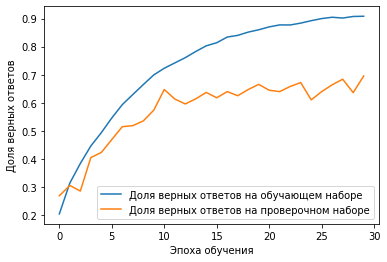

Точность при dense  256 , Step  300 =  0.6953125


In [0]:
dropout = 0.5
dense = 256
steps = [300]
for step in steps:
  model = Sequential()
  model.add(BatchNormalization(input_shape=(112, 112, 3)))
  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())
  model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())
  model.add(Conv2D(8, (3, 3), padding='same', activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(dense, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(8, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=1e-4), 
                metrics=['accuracy'])

  history = model.fit(train_generator,
          steps_per_epoch=step,
          epochs=30,
          validation_data=validation_generator,
          validation_steps=10,
          verbose=1)
  plotAny()
  print ('Точность при dense ', dense, ', Step ', step, '= ',history.history['val_accuracy'][-1])

### **Вывод:** модель обучилась на 92%, на проверочном наборе результат 67-70%. Можно усложнить Нейронную Сеть и попробовать лучше обучить НС. 

In [0]:
print('Вывод: модель НС обучилась на ', history.history['accuracy'][-1],
'%, на проверочном наборе результат =', history.history['val_accuracy'][-1],
'. Можно усложнить НС и лучше обучить НС. Но это долгий процесс и колаб часто "не вывозит"')

Вывод: модель НС обучилась на  0.9083272 %, на проверочном наборе результат = 0.6953125 . Можно усложнить НС и лучше обучить НС. Но это долгий процесс и колаб часто "не вывозит"


# Проверяю на тестовых картинках как работает построенная НС

In [0]:
#Загружаю картинки
files.upload()

In [0]:
!ls


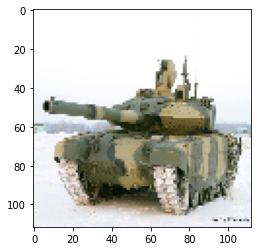

Распознанный образ:  6
Название распознанного образа:  T-90


In [0]:
#Передаю картинки Нейронной Сети через функцию predictImage()
img_path = 'T90-4.jpg'
predictImage() 

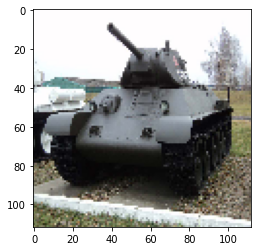

Распознанный образ:  5
Название распознанного образа:  T-34


In [0]:
img_path = 'T-34_2.jpg'
predictImage() 

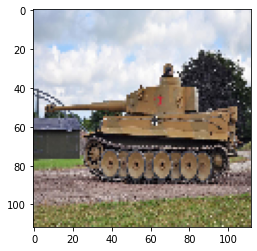

Распознанный образ:  0
Название распознанного образа:  Ferdinand


In [0]:
img_path = 'Tigre_3.jpg'
predictImage() 

Итог: для работы с изображениями нужны хорошие вычислительные мощности, можно предобработать картинки для того чтобы они сохраняли пропорции и НС обучилась качественнее.